In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the diabetes dataset depuis le module sklearn

In [2]:
diabetes = datasets.load_diabetes()

## Description du datasets

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Création d'un modèle de régression linéaire

In [4]:
X = diabetes.data
y = diabetes.target
featurenames = diabetes.feature_names
dataframe = pd.DataFrame(X,columns = featurenames)
dataframe['Target'] = y

In [5]:
dataframe.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Division du jeu de données

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [7]:
scaler = StandardScaler()

In [8]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrainement du modèle

In [10]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

## Faire un test de prédiction

In [11]:
pred = regression.predict(X_test)

In [13]:
print(pred)

[138.46970031 181.10052342 125.34400904 292.75977277 123.8830531
  91.89830434 257.26463123 177.76169318  84.98549706 109.15960992
  94.4855284  166.13235108  57.40742502 206.13897354  97.7811842
 131.00472765 214.29789972 252.52907661 199.66656381 219.49985634
 203.23671317  88.00656925  70.65108459 186.92233427 155.81266751
 162.81022205 191.93135706 184.72924276  46.62920829 108.26566599
 178.14743952  91.35065005 127.72125745 184.04205666 172.23799897
 189.51548863 121.83265708 117.75339206 145.67950306  58.57563401
  72.55421321 107.27571105 166.15280313 153.29339984 165.19282154
  62.95752038  73.58909449 110.05656189  54.49723354 164.88920632
 152.49472803  63.8874565  111.4354561  108.34936269 179.96973311
 158.70054112  95.04833555 209.68990406 118.37356519  69.69946093
 189.04680627 204.99138626 140.26840176 105.75963198 131.22316354
 201.65649349 173.60251683 164.25810664 122.01567481 143.53425629
 179.42286037 201.32086534 234.50804093 146.96093984  80.27567403
 160.8682217

### Evaluer la force de prédiction du modèle
### pour voir quels sont les arguments qui soutiennent que le modèle est performant ?

### -- Il faut peut-être regarder si les résidus suivent une loi normale de distribution :
### - Résidus = la différence entre  les prédictions et les résultats attendus (y_test)


In [14]:
residuels = y_test - pred

In [15]:
print(residuels)

[  80.53029969 -111.10052342   76.65599096  -62.75977277  -12.8830531
   -7.89830434  -15.26463123   94.23830682    9.01450294  -13.15960992
   -0.4855284    85.86764892   41.59257498   90.86102646   37.2188158
  -64.00472765   80.70210028   11.47092339  -29.66656381   55.50014366
  106.76328683  -24.00656925   57.34891541   45.07766573  -26.81266751
  -44.81022205   71.06864294 -107.72924276    1.37079171   -1.26566599
  -38.14743952   21.64934995  -37.72125745  -20.04205666    7.76200103
   43.48451137  -79.83265708  -33.75339206   26.32049694    4.42436599
  -24.55421321    0.72428895  -10.15280313   14.70660016  -75.19282154
  -10.95752038  126.41090551  -23.05656189   35.50276646   93.11079368
  -16.49472803   94.1125435   -42.4354561   -36.34936269   -8.96973311
  -63.70054112  -23.04833555  -58.68990406   49.62643481   -9.69946093
  -67.04680627 -152.99138626   46.73159824   -3.75963198   82.77683646
   46.34350651    7.39748317  -54.25810664   17.98432519   58.46574371
  -78.42

## Seaborn pour mieux voir la distrubution de la densité
### - On voit que la densité epouse la forme de la réalité d'une distribution Gaussienne

/home/bouityvo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


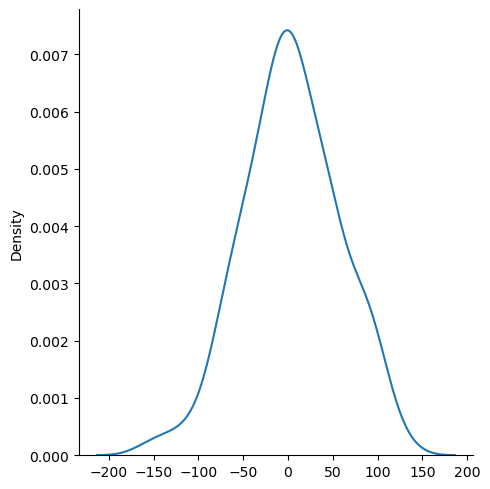

In [16]:
sns.displot(residuels,kind="kde")

### Pour aller loin, on peut observer d'autres Métriques (valeurs de performance)
### 1. MSE
### 2. MAE
### 3. SMSE : racine carrée de la MSE
#### On pourrait aussi regarder le R square ou le adjusted R square

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

41.919378456792735
2821.750981001311
53.120156070942706


## Ce qui nous intérresse, c'est de savoir comment notre modèle
## se comporte sur de nouvelles données
### 1. nous allons récupérer une nouvelle donnée à partir du dataset

In [21]:
new = diabetes.data[0].reshape(1,-1)
new_scaled = scaler.transform(new)
pred_new = regression.predict(new_scaled)
print(pred_new)

[209.68990406]


### Enregistrement du modèle
### et du scaler qui a été utilisé
### nécessaire pour notre API

In [22]:
import pickle

pickle.dump(regression,open('regmodel.pkl','wb'))
pickle.dump(regression,open('scaling.pkl','wb'))